<a href="https://colab.research.google.com/github/hadushb/machine-learning/blob/main/Intelligent_Call_Anti_Theft_with_Advanced_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=57f9f526653d5eeafca9107694267fa2a33946a6f171e9b11ee3860bcd5f6a4c
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
!pip install face_recognition

In [ ]:
!pip show face_recognition

Name: face-recognition
Version: 1.3.0
Summary: Recognize faces from Python or from the command line
Home-page: https://github.com/ageitgey/face_recognition
Author: Adam Geitgey
Author-email: ageitgey@gmail.com
License: MIT license
Location: /usr/local/lib/python3.11/dist-packages
Requires: Click, dlib, face-recognition-models, numpy, Pillow
Required-by: 


In [ ]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112, 112)
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 67 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(input_shape=(112, 112, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze backbone for faster training

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='softmax')(x)  # 3 classes for 3 persons

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


<ipython-input-6-91ab5b245b6f>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(112, 112, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 56, 56,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 56, 56,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 56, 56,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 56, 56,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 56, 56,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 56, 56,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 56, 56,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 56, 56,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 57, 57,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 28, 28,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 28, 28,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 28, 28,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 28, 28,    │      2,304 │ block_1_depthwis

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
EPOCHS = 200

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - accuracy: 0.4165 - loss: 2.1069 - val_accuracy: 0.1333 - val_loss: 2.1006
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4805 - loss: 1.6323 - val_accuracy: 0.1333 - val_loss: 2.4846
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6308 - loss: 1.0608 - val_accuracy: 0.2667 - val_loss: 2.0652
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7160 - loss: 0.7495 - val_accuracy: 0.3333 - val_loss: 1.6355
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8579 - loss: 0.3503 - val_accuracy: 0.3333 - val_loss: 1.4633
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8365 - loss: 0.5558 - val_accuracy: 0.3333 - val_loss: 1.6612
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8696 - loss: 0.3826 - val_accuracy: 0.4667 - val_loss: 1.4161
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9554 - loss: 0.1552 - val_accuracy: 0.5333 - val_loss: 1.7277


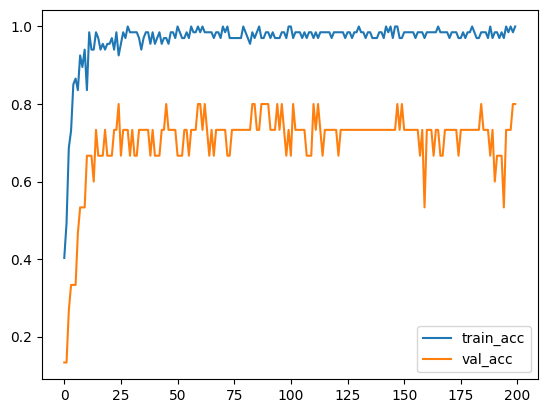

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable post-training quantization
# Optionally, provide a representative dataset for full integer quantization:
# converter.representative_dataset = representative_data_gen
tflite_model = converter.convert()
open('face_model.tflite','wb').write(tflite_model)


Saved artifact at '/tmp/tmpz_8eqp2r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138332264533648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264536912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264538064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264538832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264536528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264537872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13833226454036

2504440

In [ ]:
model.save("face_recognition_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("face_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmppr4o31i5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138332264533648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264536912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264538064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264538832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264536528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264539984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138332264537872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13833226454036

In [ ]:
# Save the trained model as an HDF5 file
model.save('face_model.h5')
print("Model saved as face_model.h5")


Model saved as face_model.h5


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/face_recognition_model.h5')  # Adjust path if needed


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import io

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[file_name]))
    img = img.resize((112, 112))  # Use (224, 224) if your model input requires that
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 112, 112, 3)


Saving piclumen-1748517177722.png to piclumen-1748517177722.png
Saving 1748449847135-removebg-preview.png to 1748449847135-removebg-preview.png
Saving 719full-fryat-yemane-removebg-preview.png to 719full-fryat-yemane-removebg-preview.png


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import io
import tensorflow as tf
from tensorflow.keras.models import load_model

# Assuming the model is already loaded in a previous cell
# model = load_model('/content/face_recognition_model.h5')

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[file_name]))
    # Convert image to RGB format to remove potential alpha channel
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((112, 112))  # Use (224, 224) if your model input requires that
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 112, 112, 3)

# Assuming the next cell will use img_array

Saving piclumen-1748517177722.png to piclumen-1748517177722 (1).png
Saving 1748449847135-removebg-preview.png to 1748449847135-removebg-preview (1).png
Saving 719full-fryat-yemane-removebg-preview.png to 719full-fryat-yemane-removebg-preview (1).png


In [ ]:
pred = model.predict(img_array)[0]
class_index = np.argmax(pred)

# Adjust this based on your classes
if class_index == 0:
    print("✅ Authorized person")
else:
    print("❌ Unauthorized person")

print(f"Prediction scores: {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
❌ Unauthorized person
Prediction scores: [0.09362701 0.8134838  0.09288914]
